# Monte Carlo Simulation for Random walks

### Objective:

We will be using a Monte Carlo simulation to look at the potential evolution of asset prices over time, assuming they are subject to daily returns that follow a normal distribution (n.b. as we know, asset price returns usually follow a distribution that is more leptokurtic (fat tailed) than a normal distribution, but a normal distribution is often assumed for these kind of purposes). This type of price evolution is also known as a “random walk”.

### Motivation:

If we want to buy a particular stock, for example, we may like to try to look into the future and attempt to predict what kind of returns we can expect with what kind of probability, or we may be interested in investigating what potential extreme outcomes we may experience and how exposed we are to the risk of ruin or, on the flip side, superior returns.

### Mathematical Concepts:

We need to estimate the expected level of return (mu) and volatility (vol) of the stock in question. This data can be estimated from historic prices, with the simplest methods just assuming past mean return and volatility levels will continue into the future. 

#### Volatility:
    Volatility often refers to the amount of uncertainty or risk related to the size of changes in a security's value. A higher volatility means that a security's value can potentially be spread out over a larger range of values. This means that the price of the security can change dramatically over a short time period in either direction. A lower volatility means that a security's value does not fluctuate dramatically, and tends to be more steady.
    Highly volatile investments have large standard deviations because their annual returns can vary significantly from their average annual return. Less volatile stocks have smaller standard deviations because their annual returns are closer to their average annual return.
    For example, the standard deviation of a savings account is zero because the annual rate is the expected rate of return (assuming you don't deposit or withdraw any money). In contrast, a stock's price can vary significantly from its average return, thus causing a higher standard deviation. The standard deviation of a stock is generally greater than the savings account or a bond held to maturity.

#### Compound Annual Growth Rate:

Mathematical Concepts:

When Principal amount is compounded annually at a rate of interest R (in % per year, and r=R/100), then the final amount after t years => Pt = Po(1+r)^(t)

r = R/100 is the Compounded Annual Growth Rate.


Compound annual growth rate, or CAGR, is the mean annual growth rate of an investment over a specified period of time longer than one year. It represents one of the most accurate ways to calculate and determine returns for individual assets, investment portfolios, and anything that can rise or fall in value over time

    To compare the performance and risk characteristics between investment alternatives, investors can use a risk-adjusted CAGR. A simple method for calculating a risk-adjusted CAGR is to multiply the CAGR by one minus the standard deviation. If the standard deviation (risk) is zero, the risk-adjusted CAGR is unaffected. The larger the standard deviation, the lower the risk-adjusted CAGR.

CAGR and Risk
It is important to remember two things when using the CAGR:
    1. The CAGR does not reflect investment risk.
    2. You must use the same time periods.

In [68]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from pandas_datareader import data
from scipy.stats import norm
import seaborn as sns

In [70]:
sns.set(style= "darkgrid" )

In [3]:
apple = data.DataReader('AAPL', 'yahoo',start='1/1/2000')

In [4]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.863657
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.790842
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.802415
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.732975
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.767695


In [5]:
apple.shape

(5213, 6)

In [9]:
apple.index.max(), apple.index.min() # the index are in the format year-month-date

(Timestamp('2020-09-21 00:00:00'), Timestamp('2000-01-03 00:00:00'))

In [24]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5213 entries, 2000-01-03 to 2020-09-21
Data columns (total 6 columns):
High         5213 non-null float64
Low          5213 non-null float64
Open         5213 non-null float64
Close        5213 non-null float64
Volume       5213 non-null float64
Adj Close    5213 non-null float64
dtypes: float64(6)
memory usage: 285.1 KB


In [25]:
# get the total numebr of days in order to calculate the CAGR
days = (apple.index[-1]-apple.index[0]).days
print('the total number of days are', days)

('the total number of days are', 7567)


In [51]:
# CAGR = (Pt/Po)^(1/t) - 1
CAGR = ((apple['Adj Close'][-1]/apple['Adj Close'][1]))**(365.0/days) - 1 
print ('CAGR =',str(round(cagr,4)*100)+"%")

# Assign the value of CAGR as the mu or the mean growth rate.
mu = CAGR

('CAGR =', '26.88%')


In [63]:
apple['Returns'] = apple['Adj Close'].pct_change()
apple.head()

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.863657,NaN
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.790842,-0.084311
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.802415,0.014634
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.732975,-0.086539
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.767695,0.047368


In [64]:
vol = apple['Returns'].std()*math.sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

('Annual Volatility =', '40.71%')


Now we know our mean return input (mu) is 23.09% and our volatility input (vol) is 42.59% 

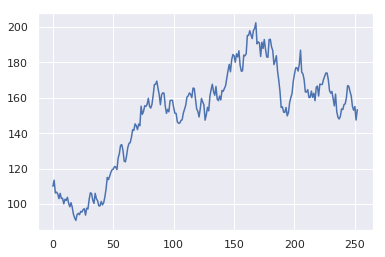

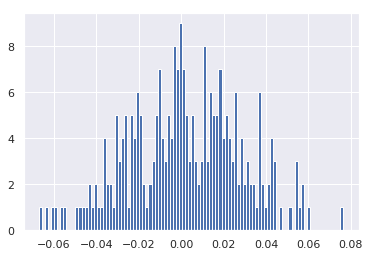

In [79]:
#Define Variables
S = apple['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2688 #Return
vol = 0.4259 #Volatility
#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1
#set starting price and create price series generated by above random daily returns
price_list = [S]
for x in daily_returns:
    price_list.append(price_list[-1]*x)
#Generate Plots - price series and histogram of daily returns
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

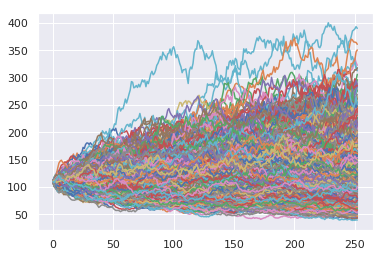

<Figure size 1440x1440 with 0 Axes>

In [85]:
#Define Variables
S = apple['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4071 #Volatility
#choose number of runs to simulate - I have chosen 1000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
#show the plot of multiple price series created above
plt.figure(figsize=(20,20))
plt.show()

Amazing! Now we can see the potential outcomes generated from 1000 different simulations, all based on the same basic inputs, allowing for the randomness of the daily return series.

The spread of final prices is quite large, ranging from around $45 to $500! That’s a pretty wide spread!

In it’s current format, with the chart being so full of data it can be a little difficult to actually see clearly what is going on – so this is where we come back to the histogram that we removed before, albeit this time it will show us the distribution of ending simulation values, rather than the distribution of daily returns for an individual simulation. I have also simulated 10,000 runs this time to give us more data.

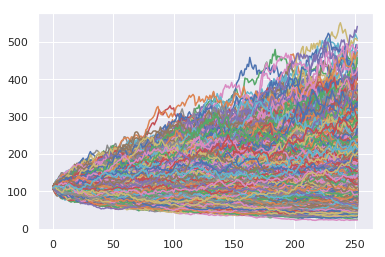

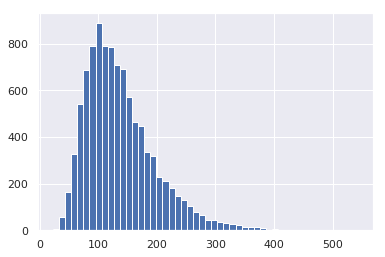

In [86]:
result = []
#Define Variables
S = apple['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4259 #Volatility
#choose number of runs to simulate - I have chosen 10,000
for i in range(10000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])
#show the plot of multiple price series created above
plt.show()
#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.show()

In [87]:
#use numpy mean function to calculate the mean of the result
print(round(np.mean(result),2))

138.23


In [88]:
print("5% quantile =",np.percentile(result,5))
print("95% quantile =",np.percentile(result,95))

('5% quantile =', 63.0858801311947)
('95% quantile =', 255.14252059855656)


Of course you will get a slightly different result due to the fact that these are simulations of random daily return draws. The more paths or “runs” you include in each simulation, the more the mean value will tend towards the mean return we used as our “mu” input. This is as a result of the law of large numbers.

We can also take a look at a couple of “quantiles” of the potential price distribution, to get an idea of the likelyhood of very high or very low returns.

So we now know that there is a 5% chance that our stock price will end up below around dollars 63.52 and a 
5 percent chance it will finish above dollars 258.44.

So now we can begin to ask ourselves questions along the lines of “am I willing to risk a 5 percent chance of ending up with a stock worth less than dollars 63.52, in order to chase an expected return of around 
23 precent  giving us an expected stock price of around dollars141.15?”

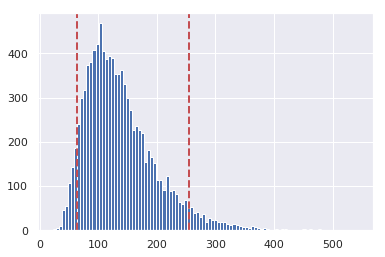

In [89]:
plt.hist(result,bins=100)
plt.axvline(np.percentile(result,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(result,95), color='r', linestyle='dashed', linewidth=2)
plt.show()